# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


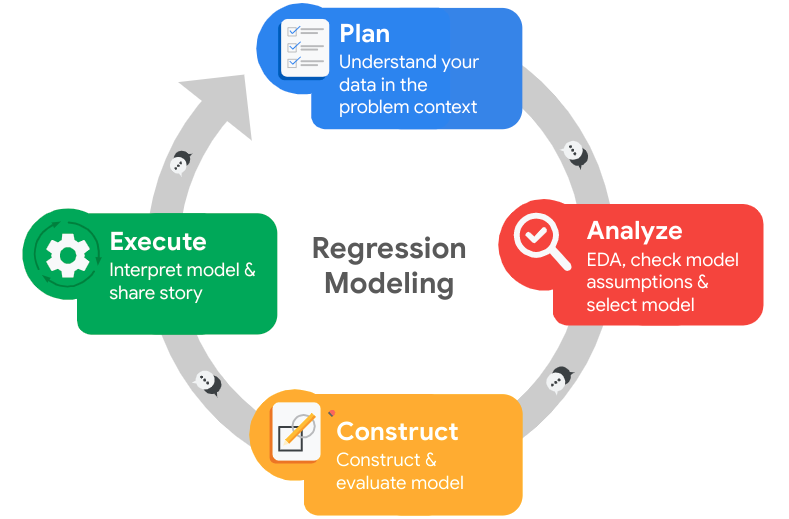

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?  
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




> *  Who are your stakeholders for this project?  
>     - senior leadership 
> - What are you trying to solve or accomplish?   
>     - Predicting the factors that contribute most to turnover
> - What are your initial observations when you explore the data?
>     - "left" is my label
>     - I predict the "satisfaction_level" feature wont be a quientissential contributor to the prediction
>     - I predict "pay" and "hours" worked will be
>     - Engineer : burnout variable with hours worked with accidents
>     - Engineer : not being paid enough for good performance
> - What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
>     - Previous courses and Kaggle
> - Do you have any ethical considerations in this stage?
>     - Employeer could misuse this information to terminate/harass employees

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd

import pickle as pkl

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import sklearn.metrics as metrics
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df.head(25)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df = df.rename(columns={'satisfaction_level':'satisfaction', 'time_spend_company':'tenure', 'Work_accident':'work_accident', 'Department':'department', 'average_montly_hours':'average_monthly_hours'})

# Display all column names after the update
### YOUR CODE HERE ###
df.columns

Index(['satisfaction', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df.isnull().nunique(axis=0)

satisfaction             1
last_evaluation          1
number_project           1
average_monthly_hours    1
tenure                   1
work_accident            1
left                     1
promotion_last_5years    1
department               1
salary                   1
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df.loc[df.duplicated() == True]

,satisfaction,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df_clean = df.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df_clean.head(15)

,satisfaction,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

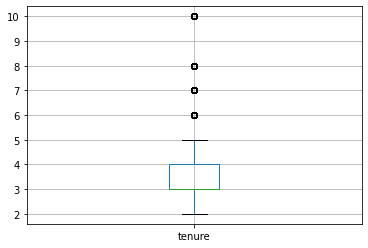

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
boxplot = df.boxplot(column=['tenure'])


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
print(f"Number of outliers : {df[df['tenure'] > 5].count()[0]}")

print(f"Number of outliers that left: {df[ (df['tenure'] > 5) & (df['left']==1)].count()[0]}")

Number of outliers : 1282
Number of outliers that left: 209


> Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(f"Number of employees that left: {df['left'].value_counts()[1]}")
print(f"Number of employees retained: {df['left'].value_counts()[0]}")

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
x = df['left'].value_counts(normalize=True)
print(f"{100*x[0]:2.2f}% of employees stayed while {100*x[1]:2.2f}% left" )

print("\nClasses are not too unbalanced (>=90%) s.t. sampling techniques are required.\nThis could change if outliers above were removed.")

Number of employees that left: 3571
Number of employees retained: 11428
76.19% of employees stayed while 23.81% left

Classes are not too unbalanced (>=90%) s.t. sampling techniques are required.
This could change if outliers above were removed.


> -  What am I trying to prove here?
> 
> Lets first try Binomial logistic regression by testing assumptions (if using this model)
>     1. Linearity: Each feature is linearly related to the outcome variable (Verify with pairwise scatterplot)
>     2. Independent Observation (Assuming valid data collection - no action needed)
>     3. No multicollinearity - There is not a linear relationship between features (Verify with pairwise scatterplot)
>     4. No extreme outliers
> 
> OR use ML that don't require assumptions


In [14]:
#TODO : Convert datatype 
df_subset = df.copy()

df_subset['number_project'] = df_subset['number_project'].astype(float)
df_subset['average_monthly_hours'] = df_subset['average_monthly_hours'].astype(float)
df_subset['tenure'] = df_subset['tenure'].astype(float)
df_subset['work_accident'] = df_subset['work_accident'].astype(float)
df_subset['promotion_last_5years'] = df_subset['promotion_last_5years'].astype(float)

df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction           14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_monthly_hours  14999 non-null  float64
 4   tenure                 14999 non-null  float64
 5   work_accident          14999 non-null  float64
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  float64
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.1+ MB


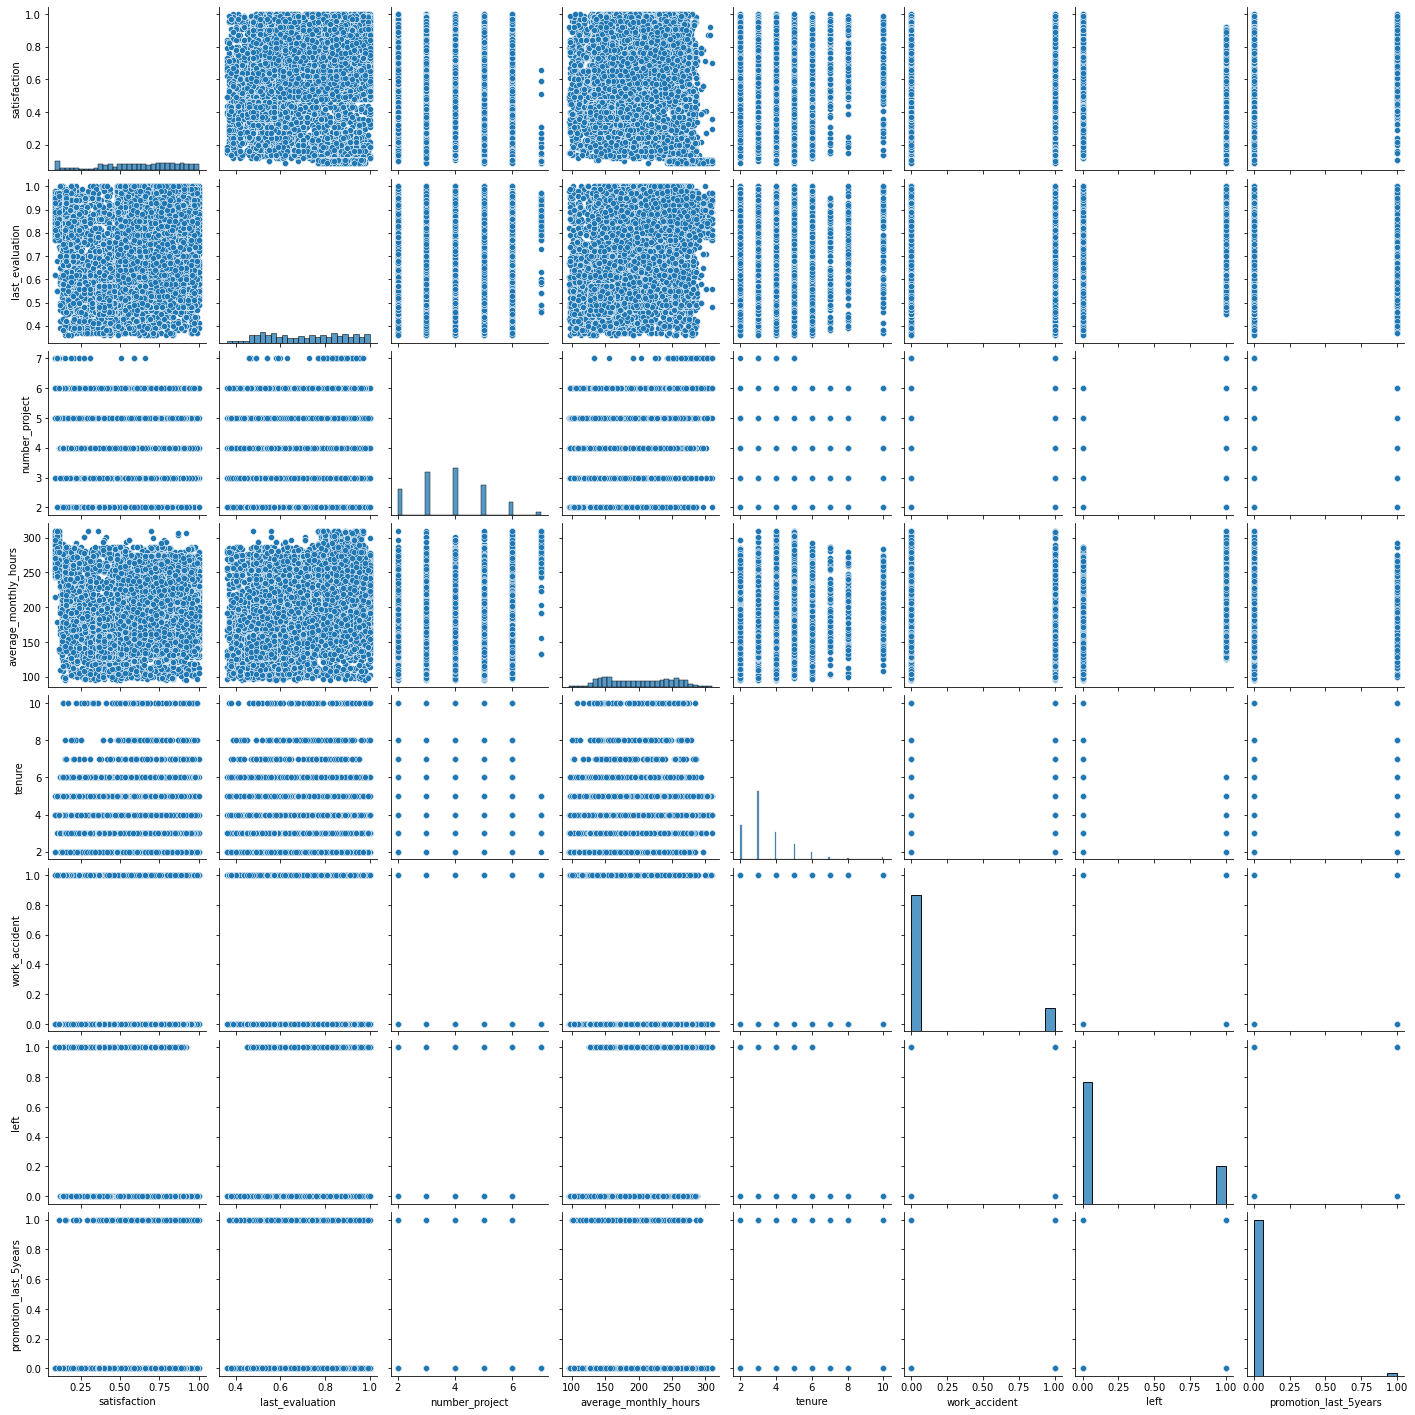

In [15]:
# Assess logistic regression assumptions
#df_subset = pd.get_dummies(df_subset, columns=['department', 'salary'])
sns.pairplot(df_subset);

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

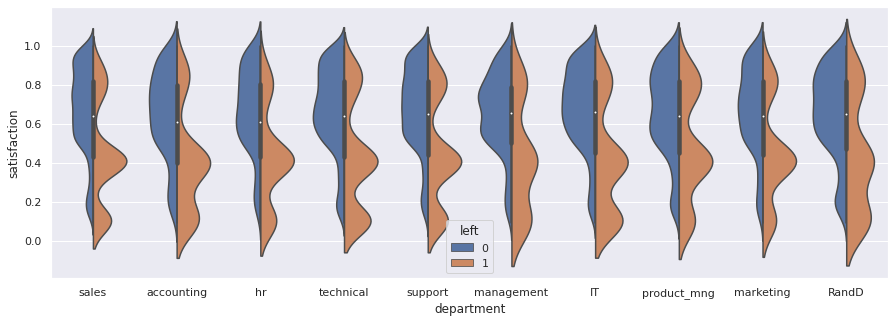

In [16]:
# finding the relationship between satisfaction and leaving by department
sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5
sns.violinplot(data = df, y=df['satisfaction'], x = df['department'], hue=df['left'], split=True, height=10, aspect=2)

# Looks like more people leave if they are less satisfied with their job. 
# Department looks like it doesnt matter
# What causes low job satisfaction? Let's start with average_hours_worked

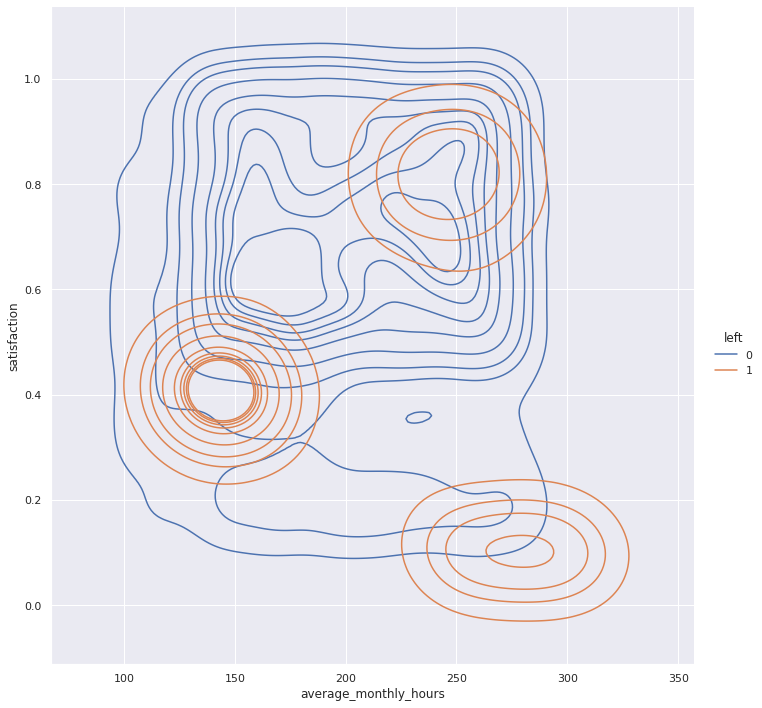

In [17]:
#finding the relationship between satisfaction and hours
sns.displot(data = df, y=df['satisfaction'], x = df['average_monthly_hours'], hue=df['left'], kind='kde', height=10, aspect=1)

# There are unique combinations of hours worked and satisfaction that lead to employees leaving. 
# How does pay contribute to satisfaction?

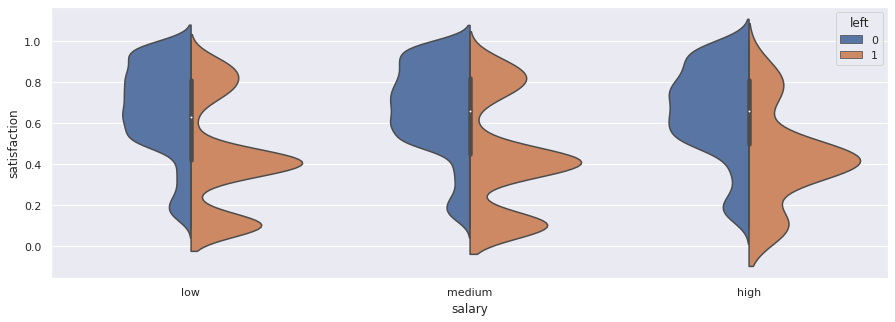

In [18]:
sns.violinplot(data = df, y=df['satisfaction'], x = df['salary'], hue=df['left'], split=True, height=10, aspect=1)

# Looks like pay ranges have similar satisfaction shapes. Pay range might not be an important factor

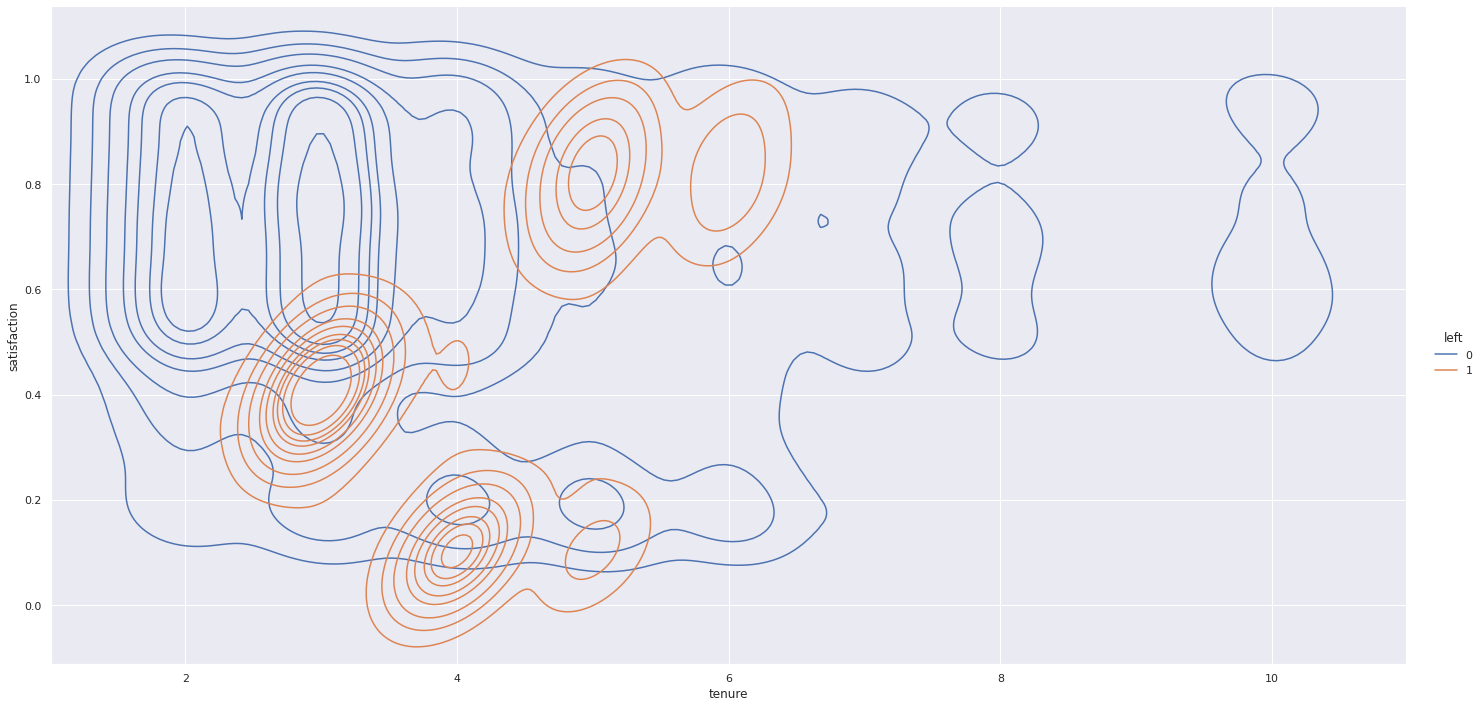

In [19]:
# Does satisfaction get better with time?
sns.displot(data = df, y=df['satisfaction'], x = df['tenure'], hue=df['left'], kind='kde', height=10, aspect=2)

# There exist unique pockets with high numbers of people leaving
# After 7 years, most people stay
# Most people start to leave after 2 years

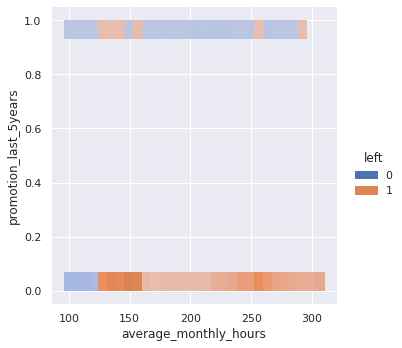

In [20]:
# Comparing promotion and hourly
sns.displot(data = df, y=df['promotion_last_5years'], x = df['average_monthly_hours'], hue=df['left'])

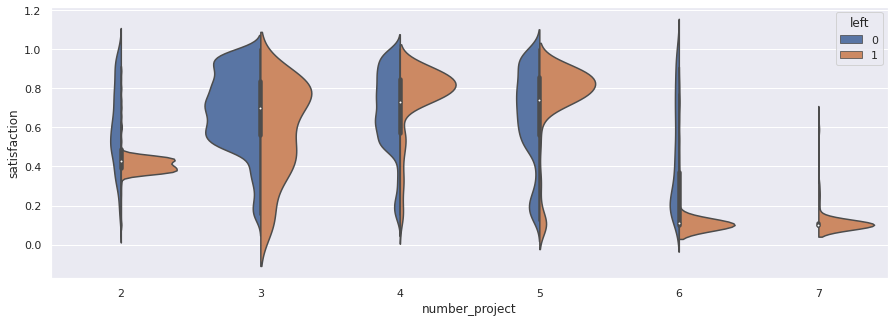

In [21]:
# Comparing satisfaction and number of projects
#sns.displot(data = df, y=df['number_project'], x = df['average_monthly_hours'], hue=df['left'], kind='kde')
sns.violinplot(data = df, y=df['satisfaction'], x = df['number_project'], hue=df['left'], split=True, height=10, aspect=2)

# People who get 6+ projects have low satisfaction and tend to leave (Overworked?)
# People who get 2- projects and have a mid-level satisfaction tend to leave (Bored?)
# Most people have 3-5 projects.
    # 4-5 project people have higher satisfaction but might leave

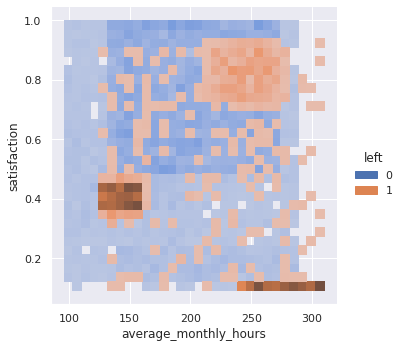

In [22]:
#Final look at data
sns.displot(data=df, y = df['satisfaction'], x = df['average_monthly_hours'], hue=df['left'])

#Looks like there are outliers after 300 hours

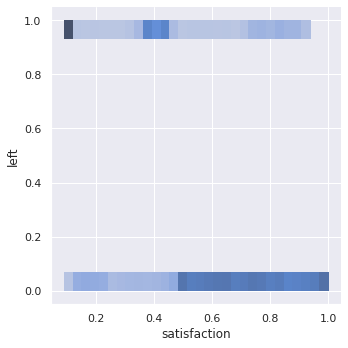

In [23]:
# Plot 6 : Left vs Satisfaction
sns.displot(data = df, y=df['left'], x = df['satisfaction'], legend=True)

### Insights

> ### Graph 1 (Satisfaction vs Department):
> - People with lower satisfaction tend to leave. 
> - All departments see the same three bumps trend in satisfaction that leads people to leave. 
>
>    **Therefore people with lower satisfaction tend to leave**
>
> ### Graph 2 (Satisfaction vs Average Monthly Hours):
> - Dense pocket of people who leave :
>     1. Satisfaction approx 0.4 in hours range [125, 170]
>     2. Satisfaction approx 0.1 in hours range [230, 300+]
> - Broad pocket of people who have not left with satisfaction [0.5, 0.9] in hour range [130, 275]
>     - Subset of left employees in here too : satisfaction approx [0.7, 0.9] in hour range of [200, 275]. 
>     
>     **Unique pockets of satisfaction vs Hours Worked have high leave zones.**
> 
> ### Graph 3 (Satisfaction vs Salary):
> - The satisfaction proportions look similar regardless of pay level. 
> 
>     **Pay may not have an impact on job satisfaction.**
> 
> ### Graph 4 (Satisfaction vs Tenure):
> - Large pockets of people who leave in years [3, 7] at various levels of satisfaction
> - People dont tend to leave before 2 years and after 7 years.
> - There is usually high satisfaction the first year of working
> 
>     **Tenure has pockets of people leaving at various levels of satifaction**
>     
> ### Graph 4 (Promotion vs Average Monthly Hours)
> - More people quit if they are not promoted. Note that some people so not make it to the 5 year mark here.
> - Higher density pockets around 150 hours and 250 hours.
> 
>     **People who are not promoted tend to leave.**
> 
> 
> ### Graph 5 (Satisfaction vs Number of Projects):
> - People like getting 3-5 projects
> - Satisfaction in the 3-5 project-range is high but people tend to still leave/stay
> 
>     **People like 3-5 projects, outside of this range and they are very likely to leave**







# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





> **Assumptions are not met for binomial logistical regression b/c:**
> 1. The relationship between feature and label is not linear - linearity assumption not met 
> 2. Relationships between data is hard to verify.
> 
> **Therefore, I'll opt for a machine learning approach**
> Note:
> - Outliers exist
> - 75/25 sample balance
> - Features may NOT be independent from each other (Dont use native bayes)
> 
> **Lets try random forest = bagging + decision tree.**

In [24]:
#Lets one=hot encode the object items before building up the model.
df_subset = pd.get_dummies(df, columns=['department', 'salary'])

In [25]:
# Separating the label from the features
y = df_subset['left']
X = df_subset.drop('left', axis=1)

In [26]:
# Double checking sizes
print(y.shape)
X.info()

(14999,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_monthly_hours   14999 non-null  int64  
 4   tenure                  14999 non-null  int64  
 5   work_accident           14999 non-null  int64  
 6   promotion_last_5years   14999 non-null  int64  
 7   department_IT           14999 non-null  uint8  
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999

In [27]:
# Allocating data for testing (tr(56%), val(19%), test(25%))
# Using a validation set in case more algos are tried. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [28]:
# Defining the hyperparameters
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [29]:
# Scoring Method
scoring = 'f1' # Using the harmonic mean


In [30]:
#Create list of split indicies
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [31]:
#Instantiate Model
rf = RandomForestClassifier(random_state=0)

In [32]:
#Search over specific param
rf_val=GridSearchCV(rf, cv_params, cv=custom_split, refit=scoring, n_jobs = -1, verbose = 2)

In [34]:
# Fit the model
#%%time 

rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    5.0s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weigh...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, r

In [35]:
#Capturing the best param values
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [36]:
#Loading optimal values
rf_opt = RandomForestClassifier(max_depth = 50,
                                max_features = 'sqrt',
                                max_samples = 0.9,
                                min_samples_leaf = 1,
                                min_samples_split = 0.001,
                                n_estimators = 100,
                                random_state = 0)


In [37]:
#Retraining the model
rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
#Predict on test set
y_pred = rf_opt.predict(X_test)

💭
### Reflect on these questions as you complete the constructing stage.

1. Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



> 1. Outliers exist and groupings exist
> - I plan to use all variables for the random forest model
> - The assumptions for logistic regression are not met - it doesnt appear that the features are linearly related to the labels
> - The random forest model fit well but maybe too well. Overfitting might have occured - more testing is needed to confirm.
> - There are boosting techniques that might help here but performance gains will most likely be small. 
> - The Sklearn and pandas reference guides are very useful - old course material as well.
> - I hope this prediction model won't single out employees - data collection should be stripping personal info that could be used to identify a person. Wages didn't significantly contribute to retension - I hope wages keep up with inflation.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



> - Satisfaction was a large contributor in predicting retension with a handful of other items. 
> - Focus should be on employee satisfaction, tenure, the number of projects, average monthly hours, and the last evaluation score. These items contribute the most to prediction employee retention
> - Another trade study is required to understand what contributes to satisfaction. Features s.a. number of projects and hours worked could contribute to satisfaction but data should be collected to understand this metric.
> - I want to try more models to see if boosting would get better results
> - 
> - Course material and the pandas/sklearn reference guides
> - Keeping the data private and making sure the data isnt used to single people out or pay people less. 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




The F1 score is 0.950
The accuracy score is 0.978
The recall score is 0.915
The precision score is 0.989


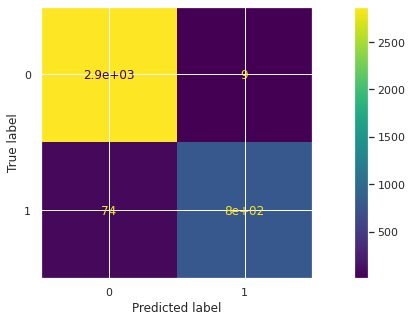

In [43]:
# Getting score from test
pc_test = precision_score(y_test, y_pred)
rc_test = recall_score(y_test, y_pred)
ac_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print("The F1 score is {f1:.3f}".format(f1 = f1_test))
print("The accuracy score is {ac:.3f}".format(ac = ac_test))
print("The recall score is {rc:.3f}".format(rc = rc_test))
print("The precision score is {pc:.3f}".format(pc = pc_test))

cm = metrics.confusion_matrix(y_test, y_pred, labels = rf_opt.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_opt.classes_)
disp.plot()

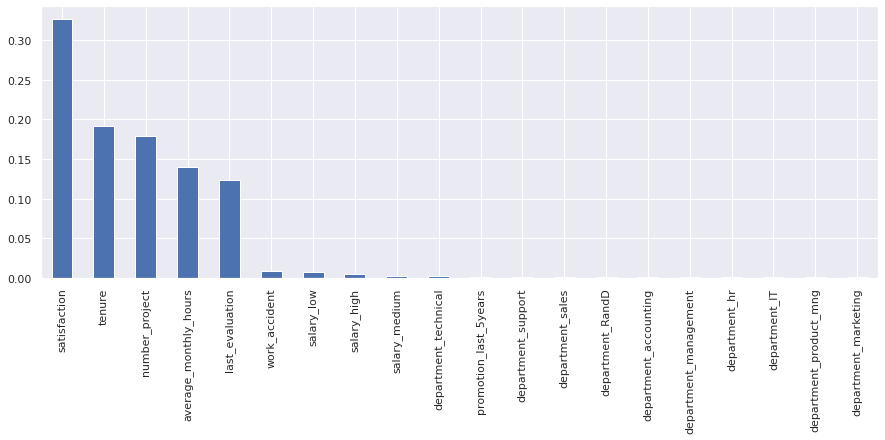

In [44]:
# Feature Importance
importances = rf_opt.feature_importances_
rf_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax);

### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.